In [10]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from fbprophet.plot import plot_plotly, plot_components_plotly
import datetime as dt

# import pandas
import pandas as pd
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet
%matplotlib inline

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400
...,...,...,...,...,...,...,...
11810,2019-06-26,110.849998,111.080002,110.099998,110.160004,110.160004,4161700
11811,2019-06-27,110.059998,110.510002,108.860001,110.099998,110.099998,5481300
11812,2019-06-28,110.550003,111.510002,110.239998,110.489998,110.489998,6506700
11813,2019-07-01,111.300003,111.970001,110.019997,110.620003,110.620003,5514700


* use only `Date` and `Adj Close` columns

In [5]:
df = wmt[['Date','Adj Close']]
df

,Date,Adj Close
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047
...,...,...
11810,2019-06-26,110.160004
11811,2019-06-27,110.099998
11812,2019-06-28,110.489998
11813,2019-07-01,110.620003


* rename columns to fit Prophet naming convention

In [7]:
df = df.rename(columns={'Date':'ds','Adj Close':'y'})
df

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047
...,...,...
11810,2019-06-26,110.160004
11811,2019-06-27,110.099998
11812,2019-06-28,110.489998
11813,2019-07-01,110.620003


* convert date to datetime

In [16]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [15]:
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047
...,...,...
11810,2019-06-26,110.160004
11811,2019-06-27,110.099998
11812,2019-06-28,110.489998
11813,2019-07-01,110.620003


* plot time-series

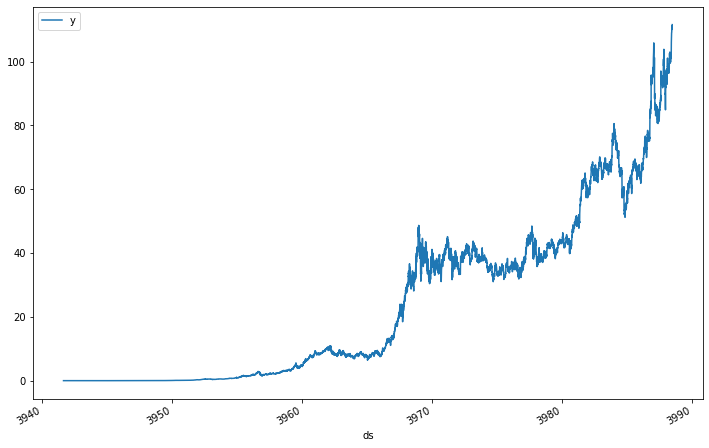

In [18]:
ax = df.set_index('ds').plot(figsize=(12, 8))

* instantiate Prophet

In [19]:
fb = Prophet()

* fit model

In [20]:
fb.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* forecast 365 values in future 

In [21]:
future_dates = fb.make_future_dataframe(periods=365)

In [22]:
forecast = fb.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12175,2020-06-27,96.535009,91.686258,101.261231
12176,2020-06-28,96.537762,91.676907,101.540859
12177,2020-06-29,96.513977,91.709181,101.598253
12178,2020-06-30,96.534648,91.670613,101.313275
12179,2020-07-01,96.524340,91.615922,101.457854


* plot forecast

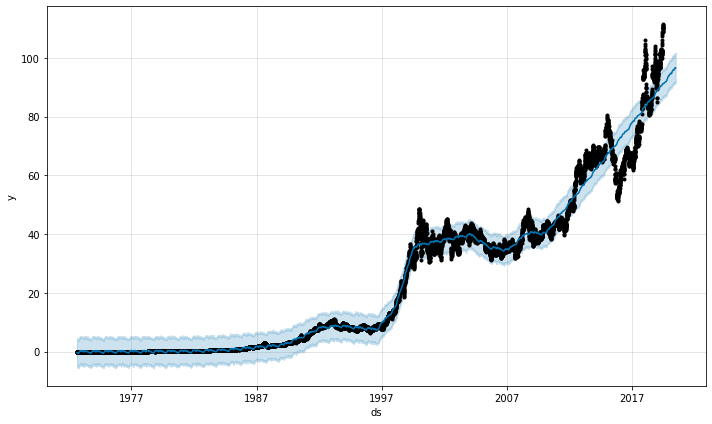

In [23]:
fb.plot(forecast,uncertainty=True);

* plot components

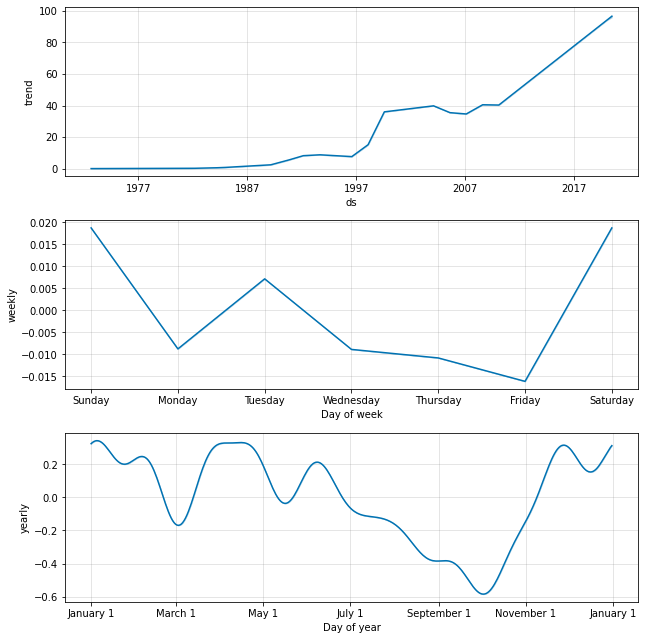

In [24]:
fb.plot_components(forecast,uncertainty=True);

- Compare the Prophet prediction vs Arima. Use the last 7 values we have in the timeseries as ground truth.

### TUTORIAL
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

### correlogram
https://stats.stackexchange.com/questions/182627/interpretation-of-correlogram/182784